In [1]:
import sqlite3
import pandas as pd
import os

## Warmup: SQL query clauses
- **SELECT**: column, column, ...  or *
- **FROM**: table
- **WHERE**:  boolean expression (if row has ....)
 - can use **AND**, **OR**, **NOT**
- **ORDER BY**  column (**ASC**, **DESC**)
- **LIMIT**: num rows

## Warmup 0: Open a connection to the movies database `movies.db`

In [2]:
# write your code here
movies_path = "movies.db"
assert os.path.exists(movies_path)
c = sqlite3.connect(movies_path)

## Warmup 1: What are the table names?

In [3]:
# write your code here
pd.read_sql("select * from sqlite_master", c)

type    name tbl_name  rootpage  \
0  table  movies   movies         2   

                                                 sql  
0  CREATE TABLE "movies" (\n"Title" TEXT,\n  "Gen...

## Warmup 2: What are the data types?

In [4]:
# write your code here
print(pd.read_sql("select * from sqlite_master", c).iloc[0]["sql"])

CREATE TABLE "movies" (
"Title" TEXT,
  "Genre" TEXT,
  "Director" TEXT,
  "Cast" TEXT,
  "Year" INTEGER,
  "Runtime" INTEGER,
  "Rating" REAL,
  "Revenue" REAL
)


## Warmup 3: What is the data in the `movies` table?

In [5]:
# write your code here
pd.read_sql("select * from movies", c)

Title                         Genre  \
0            Guardians of the Galaxy       Action,Adventure,Sci-Fi   
1                         Prometheus      Adventure,Mystery,Sci-Fi   
2                              Split               Horror,Thriller   
3                               Sing       Animation,Comedy,Family   
4                      Suicide Squad      Action,Adventure,Fantasy   
...                              ...                           ...   
1063  Guardians of the Galaxy Vol. 2     Action, Adventure, Comedy   
1064                     Baby Driver          Action, Crime, Drama   
1065                  Only the Brave      Action, Biography, Drama   
1066                   Incredibles 2  Animation, Action, Adventure   
1067                  A Star Is Born         Drama, Music, Romance   

                  Director                                               Cast  \
0               James Gunn  Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...   
1             Ridley Scott  Noomi Rapace, Logan Marshall-Green, Michael   ...   
2       M. Night Shyamalan  James McAvoy, Anya Taylor-Joy, Haley Lu Richar...   
3     Christophe Lourdelet  Matthew McConaughey,Reese Witherspoon, Seth Ma...   
4               David Ayer  Will Smith, Jared Leto, Margot Robbie, Viola D...   
...                    ...                                                ...   
1063            James Gunn  Chris Pratt, Zoe Saldana, Dave Bautista, Vin D...   
1064          Edgar Wright  Ansel Elgort, Jon Bernthal, Jon Hamm, Eiza Gon...   
1065       Joseph Kosinski  Josh Brolin, Miles Teller, Jeff Bridges, Jenni...   
1066             Brad Bird  Craig T. Nelson, Holly Hunter, Sarah Vowell, H...   
1067        Bradley Cooper  Lady Gaga, Bradley Cooper, Sam Elliott, Greg G...   

      Year  Runtime  Rating  Revenue  
0     2014      121     8.1   333.13  
1     2012      124     7.0   126.46  
2     2016      117     7.3   138.12  
3     2016      108     7.2   270.32  
4     2016      123     6.2   325.02  
...    ...      ...     ...      ...  
1063  2017      136     7.6   389.81  
1064  2017      113     7.6   107.83  
1065  2017      134     7.6    18.34  
1066  2018      118     7.6   608.58  
1067  2018      136     7.6   215.29  

[1068 rows x 8 columns]

#### This function allows to type less for each query

In [6]:
def qry(sql, conn=c):
    return pd.read_sql(sql, conn)

qry("""
SELECT *
FROM movies
""")

Title                         Genre  \
0            Guardians of the Galaxy       Action,Adventure,Sci-Fi   
1                         Prometheus      Adventure,Mystery,Sci-Fi   
2                              Split               Horror,Thriller   
3                               Sing       Animation,Comedy,Family   
4                      Suicide Squad      Action,Adventure,Fantasy   
...                              ...                           ...   
1063  Guardians of the Galaxy Vol. 2     Action, Adventure, Comedy   
1064                     Baby Driver          Action, Crime, Drama   
1065                  Only the Brave      Action, Biography, Drama   
1066                   Incredibles 2  Animation, Action, Adventure   
1067                  A Star Is Born         Drama, Music, Romance   

                  Director                                               Cast  \
0               James Gunn  Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...   
1             Ridley Scott  Noomi Rapace, Logan Marshall-Green, Michael   ...   
2       M. Night Shyamalan  James McAvoy, Anya Taylor-Joy, Haley Lu Richar...   
3     Christophe Lourdelet  Matthew McConaughey,Reese Witherspoon, Seth Ma...   
4               David Ayer  Will Smith, Jared Leto, Margot Robbie, Viola D...   
...                    ...                                                ...   
1063            James Gunn  Chris Pratt, Zoe Saldana, Dave Bautista, Vin D...   
1064          Edgar Wright  Ansel Elgort, Jon Bernthal, Jon Hamm, Eiza Gon...   
1065       Joseph Kosinski  Josh Brolin, Miles Teller, Jeff Bridges, Jenni...   
1066             Brad Bird  Craig T. Nelson, Holly Hunter, Sarah Vowell, H...   
1067        Bradley Cooper  Lady Gaga, Bradley Cooper, Sam Elliott, Greg G...   

      Year  Runtime  Rating  Revenue  
0     2014      121     8.1   333.13  
1     2012      124     7.0   126.46  
2     2016      117     7.3   138.12  
3     2016      108     7.2   270.32  
4     2016      123     6.2   325.02  
...    ...      ...     ...      ...  
1063  2017      136     7.6   389.81  
1064  2017      113     7.6   107.83  
1065  2017      134     7.6    18.34  
1066  2018      118     7.6   608.58  
1067  2018      136     7.6   215.29  

[1068 rows x 8 columns]

## Warmup 4: What's the *Title* of the movie with the highest *Rating*?

In [7]:
# write your code here
df = qry("""
SELECT Title, Rating
FROM movies
ORDER BY Rating DESC
LIMIT 1
""")
df.iloc[0]["Title"]

'The Dark Knight'

## Warmup 5: Which *Director* made the movie with the shortest *Runtime*?

In [8]:
# write your code here
df = qry("""
SELECT Director, Runtime
FROM movies
ORDER BY Runtime
LIMIT 1
""")
df.iloc[0]["Director"]

'Claude Barras'

## Warmup 6: What was the *Director*  and *Title* of the movie with the largest *Revenue*?

In [9]:
# write your code here
df = qry("""
SELECT director, revenue, title
FROM movies
ORDER BY revenue DESC
LIMIT 1
""")
df.iloc[0]["Director"]

'J.J. Abrams'

## Warmup 7: What is the *Title* of the movie with the highest *Revenue* in *Year* 2016?

In [10]:
# write your code here
df = qry("""
SELECT title, revenue, year
FROM movies
WHERE year = 2016
ORDER BY revenue DESC
LIMIT 1
""")
df.iloc[0]["Title"]

'Rogue One'

## Warmup 8: Which *3 movies*  had the highest *Revenue* in the *Year* 2016?

In [11]:
# write your code here
df = qry("""
SELECT title, revenue
FROM movies
WHERE year = 2016
ORDER BY revenue DESC
LIMIT 3
""")
df

Title  Revenue
0                   Rogue One   532.17
1                Finding Dory   486.29
2  Captain America: Civil War   408.08

## Lecture 33: Database 2
Learning Objectives:
- Use the `AS` command to rename a column or a calculation
- Use SQL Aggregate functions to summarize database columns: 
 - `SUM`, `AVG`, `COUNT`, `MIN`, `MAX`, `DISTINCT`
- Use the `GROUP BY` command to place database rows into buckets.
- Use the `HAVING` command to apply conditions to groups.

## Example 1: Which *3 movies* have the highest *revenue-per-minute*?

The `AS` clause lets us rename a column or a calcuation

In [12]:
qry("""
SELECT title, revenue, rUnTiME, revenue / runtime AS RPM
FROM movies
ORDER BY RPM DESC
LIMIT 3
""")

Title  Revenue  Runtime       RPM
0  Star Wars: Episode VII - The Force Awakens   936.63      136  6.886985
1                              Jurassic World   652.18      124  5.259516
2                               Incredibles 2   608.58      118  5.157458

## Aggregate Queries

```
SUM, AVG, COUNT, MIN, MAX, DISTINCT
```

## Example 2: How many *rows of movies* are there?
Note: when we want to count the number of rows, we use COUNT(*)

In [13]:
qry("""
SELECT COUNT(*)
FROM movies
""")

COUNT(*)
0      1068

## Example 3: How many *directors* are there?

In [14]:
# This doesn't feel correct - it counts duplicates for director names!
qry("""
SELECT COUNT(director)
FROM movies
""")

COUNT(director)
0             1068

#### Use `COUNT(DISTINCT columname)`

In [15]:
qry("""
SELECT COUNT(DISTINCT director)
FROM movies
""")

COUNT(DISTINCT director)
0                       679

## Example 4: What are the names of the *directors* (without duplicates)?

In [16]:
df = qry("""
SELECT DISTINCT director
FROM movies
""")
list(df["Director"])

['James Gunn',
 'Ridley Scott',
 'M. Night Shyamalan',
 'Christophe Lourdelet',
 'David Ayer',
 'Yimou Zhang',
 'Damien Chazelle',
 'Sean Foley',
 'James Gray',
 'Morten Tyldum',
 'David Yates',
 'Theodore Melfi',
 'Gareth Edwards',
 'Ron Clements',
 'Nacho Vigalondo',
 'Chris Renaud',
 'Mel Gibson',
 'Paul Greengrass',
 'Garth Davis',
 'Denis Villeneuve',
 'Stephen Gaghan',
 'Kenneth Lonergan',
 'Ben Young',
 'Walt Dohrn',
 'Roland Emmerich',
 'Dominique Abel',
 'S.S. Rajamouli',
 'Phillip Guzman',
 'Jon Lucas',
 'Justin Kurzel',
 'John Hamburg',
 'Tom Ford',
 'Bryan Singer',
 'Tim Miller',
 'Paul W.S. Anderson',
 'Anthony Russo',
 'Christopher Nolan',
 'Scott Derrickson',
 'Antoine Fuqua',
 'Patrick Read Johnson',
 'Greg Tiernan',
 'Barry Jenkins',
 'Shawn Burkett',
 'John Lee Hancock',
 'Ricardo de Montreuil',
 'Rob Marshall',
 'John Madden',
 'Scott Hicks',
 'Justin Lin',
 'Sean Penn',
 'J.J. Abrams',
 'Anna Foerster',
 'Garry Marshall',
 'Chad Stahelski',
 'Martin Scorsese',
 'Fed

## Example 5: What is the total *Revenue* of *all the movies*?

In [17]:
qry("""
SELECT SUM(revenue) as "Total Revenue"
FROM movies
""").iloc[0]["Total Revenue"] * 1e6

80668269999.99995

## Example 6: What is the *average rating* across *all movies*?

* version 1: with `SUM` and `COUNT`
* version 2: with `AVG`

In [18]:
qry("""
SELECT SUM(rating) / COUNT(*)
FROM movies
""")  #.iloc[0][0]

SUM(rating) / COUNT(*)
0                6.805431

In [19]:
qry("""
SELECT AVG(rating)
FROM movies
""")  #.iloc[0][0]

AVG(rating)
0     6.805431

## Example 7: What is the *average revenue* and *average runtime* of *all the movies*?

In [20]:
qry("""
SELECT AVG(revenue), AVG(runtime)
FROM movies
""")

AVG(revenue)  AVG(runtime)
0     75.532088    114.093633

## Example 8: What is the *average revenue* for a *Ridley Scott* movie?

In [21]:
qry("""
SELECT AVG(revenue)
FROM movies
WHERE director = "Ridley Scott"
""")  #.iloc[0][0]

AVG(revenue)
0       89.8825

## Example 9: *How many movies* were there in *2016*?

In [22]:
qry("""
SELECT COUNT(*)
FROM movies
WHERE year = 2016
""")  #.iloc[0][0]

COUNT(*)
0       296

## Example 10: What was the revenue of *highest-revenue movie*?

In [23]:
qry("""
SELECT revenue
FROM movies
ORDER BY revenue DESC
LIMIT 1
""") # .iloc[0][0]

Revenue
0   936.63

In [24]:
qry("""
SELECT MAX(revenue) 
FROM movies
""") # .iloc[0][0]

MAX(revenue)
0        936.63

# GROUP BY Queries

```sql
SELECT ???, ??? FROM Movies
GROUP BY ???
```

## Example 11: What is the *total revenue* for each *year*?

In [25]:
qry("""
SELECT year, SUM(revenue)
FROM movies
GROUP BY year
""")

Year  SUM(revenue)
0   2006       3624.46
1   2007       4306.23
2   2008       5053.22
3   2009       5292.26
4   2010       5989.65
5   2011       5431.96
6   2012       6910.29
7   2013       7544.21
8   2014       7997.40
9   2015       8854.12
10  2016      11211.65
11  2017       2086.58
12  2018       2675.12
13  2019       2665.93
14  2020       1025.19

## Example 12: *How many movies* were by each *director*?

In [26]:
qry("""
SELECT director, COUNT(*) AS mov_count
FROM movies
GROUP BY director
ORDER BY mov_count DESC
limit 10
""") 

Director  mov_count
0        Ridley Scott          8
1  Paul W.S. Anderson          6
2         Michael Bay          6
3     Martin Scorsese          6
4  M. Night Shyamalan          6
5    Denis Villeneuve          6
6         David Yates          6
7   Christopher Nolan          6
8         Zack Snyder          5
9         Woody Allen          5

## Example 13: What is the *average rating* for each *director*?

In [27]:
qry("""
SELECT director, AVG(rating)
FROM movies
GROUP BY director
""")

Director  AVG(rating)
0             Aamir Khan         8.50
1           Aaron Sorkin         7.80
2    Abdellatif Kechiche         7.80
3              Adam Leon         6.50
4             Adam McKay         7.00
..                   ...          ...
674          Yimou Zhang         6.10
675     Yorgos Lanthimos         7.20
676          Zack Snyder         7.04
677        Zackary Adler         5.10
678          Zoya Akhtar         8.00

[679 rows x 2 columns]

## Example 14: How many *unique directors* created a movie in each *year*

In [28]:
qry("""
SELECT year, COUNT(DISTINCT director) AS director_count
FROM movies
GROUP BY year
""")

Year  director_count
0   2006              44
1   2007              51
2   2008              51
3   2009              51
4   2010              60
5   2011              63
6   2012              64
7   2013              88
8   2014              97
9   2015             127
10  2016             289
11  2017              22
12  2018              19
13  2019              23
14  2020               6

## Combining GROUP BY with other CLAUSES

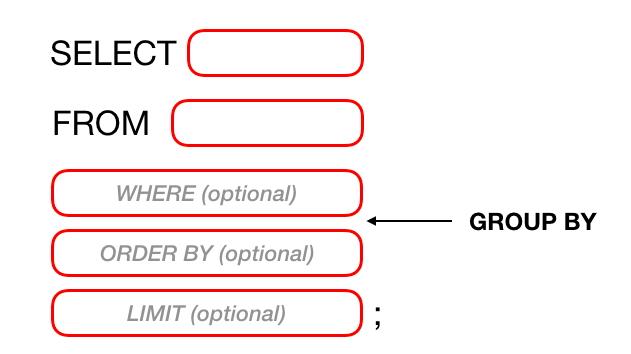

## Example 15: What is the *total revenue* of per *year*, in *recent* years?

In [29]:
# recent means 5 years
qry("""
SELECT year, SUM(revenue) AS total_revenue
FROM movies
GROUP BY Year
ORDER BY Year DESC
LIMIT 5
""")

Year  total_revenue
0  2020        1025.19
1  2019        2665.93
2  2018        2675.12
3  2017        2086.58
4  2016       11211.65

## Example 16: Which 5 *directors* have had the *most number of movies* earning *over 200M dollars*?

In [30]:
qry("""
SELECT director, COUNT(title) AS count
FROM movies
WHERE revenue > 200
GROUP BY director
ORDER BY count DESC
limit 5
""")

Director  count
0       David Yates      5
1       Michael Bay      4
2  Francis Lawrence      4
3     Anthony Russo      4
4       Zack Snyder      3

## Example 17: Which *three* of the *directors* have the *greatest average rating*?

In [31]:
qry("""
SELECT director, AVG(rating) AS avg_rating
FROM movies
GROUP BY director
ORDER BY avg_rating DESC
LIMIT 3
""")

Director  avg_rating
0      Thomas Kail         8.6
1    Sudha Kongara         8.6
2  Olivier Nakache         8.6

**Food for thought:** Why is the above question maybe not the best to ask?

Need filtering **BEFORE** and **AFTER** the `GROUP` operations
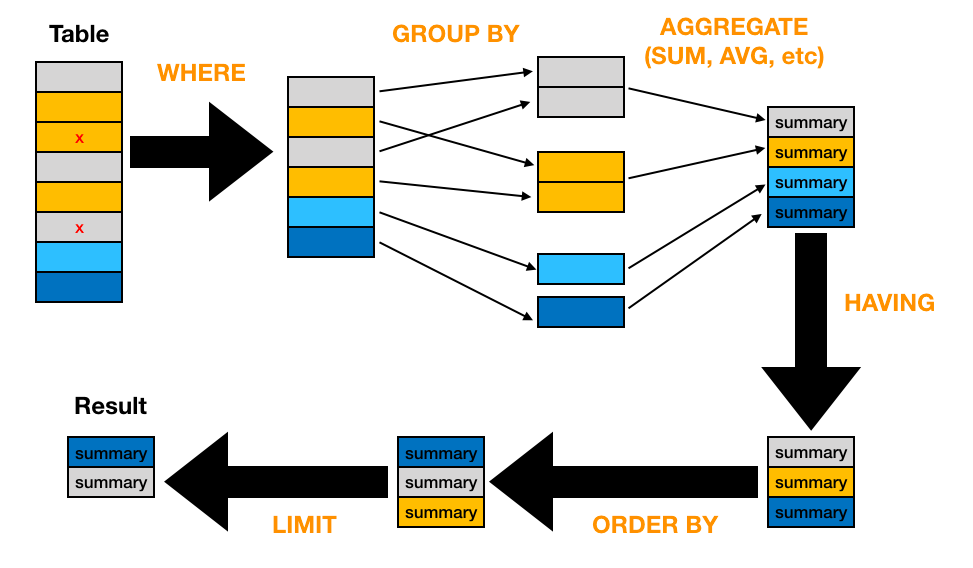

# WHERE vs. HAVING

* **WHERE**: filter rows in original table
* **HAVING**: filter groups

## Example 18: Which five directors *having* at least 3 movies score the *greatest average rating* ?

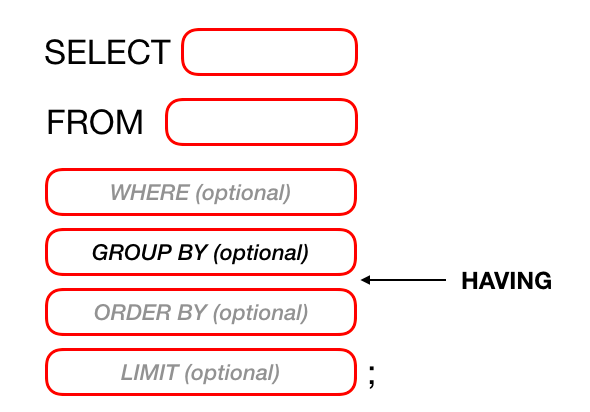

In [32]:
qry("""
SELECT director, AVG(rating) AS avg_rating, COUNT(*) as count
FROM movies
GROUP BY director
HAVING count >= 3
ORDER BY avg_rating DESC
LIMIT 3
""")

Director  avg_rating  count
0  Christopher Nolan    8.533333      6
1        Pete Docter    8.200000      3
2      Anthony Russo    8.125000      4

## Example 19: Which directors have more than 3 movies released since 2010?

In [33]:
qry("""
SELECT director, COUNT(title) AS count
FROM movies
WHERE year >= 2010
GROUP BY director
HAVING count > 3
""")

Director  count
0        Anthony Russo      4
1        Antoine Fuqua      4
2    Christopher Nolan      4
3     David O. Russell      4
4          David Yates      4
5     Denis Villeneuve      6
6            James Wan      4
7   M. Night Shyamalan      4
8      Martin Scorsese      5
9          Michael Bay      4
10       Mike Flanagan      4
11           Paul Feig      4
12  Paul W.S. Anderson      5
13          Peter Berg      4
14        Ridley Scott      5
15         Woody Allen      4

## Example 20: Which *directors* have more than *two* movies with runtimes under *100* minutes

In [34]:
qry("""
SELECT director, COUNT(title) AS count
FROM movies
WHERE runtime < 100
GROUP BY director
HAVING count > 2
""")

Director  count
0     Mike Flanagan      3
1  Nicholas Stoller      3
2      Wes Anderson      3
3       Woody Allen      4

# Don't forget to close the `movies.db` connection

In [35]:
# close the connection here
c.close()